In [1]:
# Whats up with JZ4 Event: 000004111 and the tracks being all fucked

import uproot
import awkward as ak
from pathlib import Path
import matplotlib.pyplot as plt
import sys

REPO_PATH = Path.home() / "workspace/jetpointnet"
SCRIPT_PATH = REPO_PATH / "python_scripts"
sys.path.append(str(SCRIPT_PATH))

from data_processing.jets.common_utils import calculate_cartesian_coordinates, intersection_fixed_z
from data_processing.jets.track_metadata import fixed_r, fixed_z
from data_processing.jets.preprocessing_header import POINT_TYPE_LABELS, POINT_TYPE_ENCODING


GEO_FILE_LOC = "/fast_scratch_1/atlas/pflow/rho_small.root"

# likely root awkward arr:
awk_file = "/fast_scratch_1/atlas/pflow/jhimmens_working_files/pnet_data/processed_files/collected_data/rev_3/AwkwardArrs/deltaR=0.2/val/JZ4/user.mswiatlo.39955735._000005.mltree.root_chunk_0_val.parquet"
likely_root_file = "/fast_scratch_1/atlas/pflow/20240614/user.mswiatlo.801169.Py8EG_A14NNPDF23LO_jj_JZ4.recon.ESD.e8514_e8528_s4185_s4114_r14977_2024.06.14.1_mltree.root/user.mswiatlo.39955735._000005.mltree.root"

root_file = uproot.open(likely_root_file)
geo_file = uproot.open(GEO_FILE_LOC)
root_file["EventTree"].keys()

['runNumber',
 'eventNumber',
 'lumiBlock',
 'coreFlags',
 'mcEventNumber',
 'mcChannelNumber',
 'mcEventWeight',
 'nTruthPart',
 'truthPartBarcode',
 'truthPartPdgId',
 'G4PreCalo_n_EM',
 'G4PreCalo_E_EM',
 'G4PreCalo_n_Had',
 'G4PreCalo_E_Had',
 'truthVertexX',
 'truthVertexY',
 'truthVertexZ',
 'truthPartStatus',
 'truthPartPt',
 'truthPartE',
 'truthPartMass',
 'truthPartEta',
 'truthPartPhi',
 'nTrack',
 'trackPt',
 'trackP',
 'trackMass',
 'trackEta',
 'trackPhi',
 'trackTruthParticleIndex',
 'trackVisibleCalHitCaloEnergy',
 'trackFullCalHitCaloEnergy',
 'trackSubtractedCaloEnergy',
 'trackNumberOfPixelHits',
 'trackNumberOfSCTHits',
 'trackNumberOfPixelDeadSensors',
 'trackNumberOfSCTDeadSensors',
 'trackNumberOfPixelSharedHits',
 'trackNumberOfSCTSharedHits',
 'trackNumberOfPixelHoles',
 'trackNumberOfSCTHoles',
 'trackNumberOfInnermostPixelLayerHits',
 'trackNumberOfNextToInnermostPixelLayerHits',
 'trackExpectInnermostPixelLayerHit',
 'trackExpectNextToInnermostPixelLayerHit'

# Image the root File

In [3]:
root_file = uproot.open(likely_root_file)
geo_file = uproot.open(GEO_FILE_LOC)
root_file["EventTree"].keys()
geo_file['CellGeo;1'].keys()

['cell_geo_ID',
 'cell_geo_sampling',
 'cell_geo_eta',
 'cell_geo_phi',
 'cell_geo_rPerp',
 'cell_geo_deta',
 'cell_geo_dphi',
 'cell_geo_volume',
 'cell_geo_sigma',
 'cell_geo_prevInPhi',
 'cell_geo_nextInPhi',
 'cell_geo_prevInEta',
 'cell_geo_nextInEta',
 'cell_geo_prevInSamp',
 'cell_geo_nextInSamp',
 'cell_geo_prevSubDet',
 'cell_geo_nextSubDet',
 'cell_geo_prevSuperCalo',
 'cell_geo_nextSuperCalo']

In [3]:
# for j in range(10):
#     plt.hist([len(i) for i in root_file["EventTree"]["cluster_cell_hitsTruthE"].array()[0][j]])
#     plt.show()

In [9]:
root_file["EventTree"]["trackTruthParticleIndex"].array()

<Array [[1291, 1262, 1239, ..., 342, 461, 1130], ...] type='500 * var * int32'>

-1.3942015
-1.3942095
-1.394237
-1.3942541
-1.3942643
-1.3942684
-1.3942631
0
[118.3091056433216, 124.29704462195537, 130.67305738257602, 138.7147044621559, 151.1782903953588, 167.98171650630528, 182.57400405042105] [-662.9678619301444, -696.5546389320752, -732.4021045449415, -777.5509789209199, -847.464543317762, -941.6820961872893, -1023.4533629878421] [-3790.03, -3983.68, -4195.84, -4461.25, -4869.5, -5424.5, -5905.0]
-0.5398306
-0.5397725
-0.53954697
-0.53936577
-0.5392076
-0.5389711
-0.53884125
-1.3829633
-1.3829947
-1.3830997
-1.3831705
-1.3832204
-1.3832654
-1.3832698
-0.46816492
-0.46796107
-0.4671891
-0.46659657
-0.46610662
-0.46544388
-0.4651308
-0.58159924
-0.5815457
-0.5813525
-0.5812021
-0.58107287
-0.58088845
-0.58079296
-1.3568912
-1.3568532
-1.3567123
-1.3565972
-1.3564929
-1.3563308
-1.3562374
-1.5507556
-1.5508387
-1.5511429
-1.5513612
-1.5515269
-1.5517142
-1.5517755
-0.5238263
-0.5240775
-0.52470917
-0.5251139
-0.5254752
-0.52589643
-0.52604234
-0.9662358
-0.9665381

KeyboardInterrupt: 

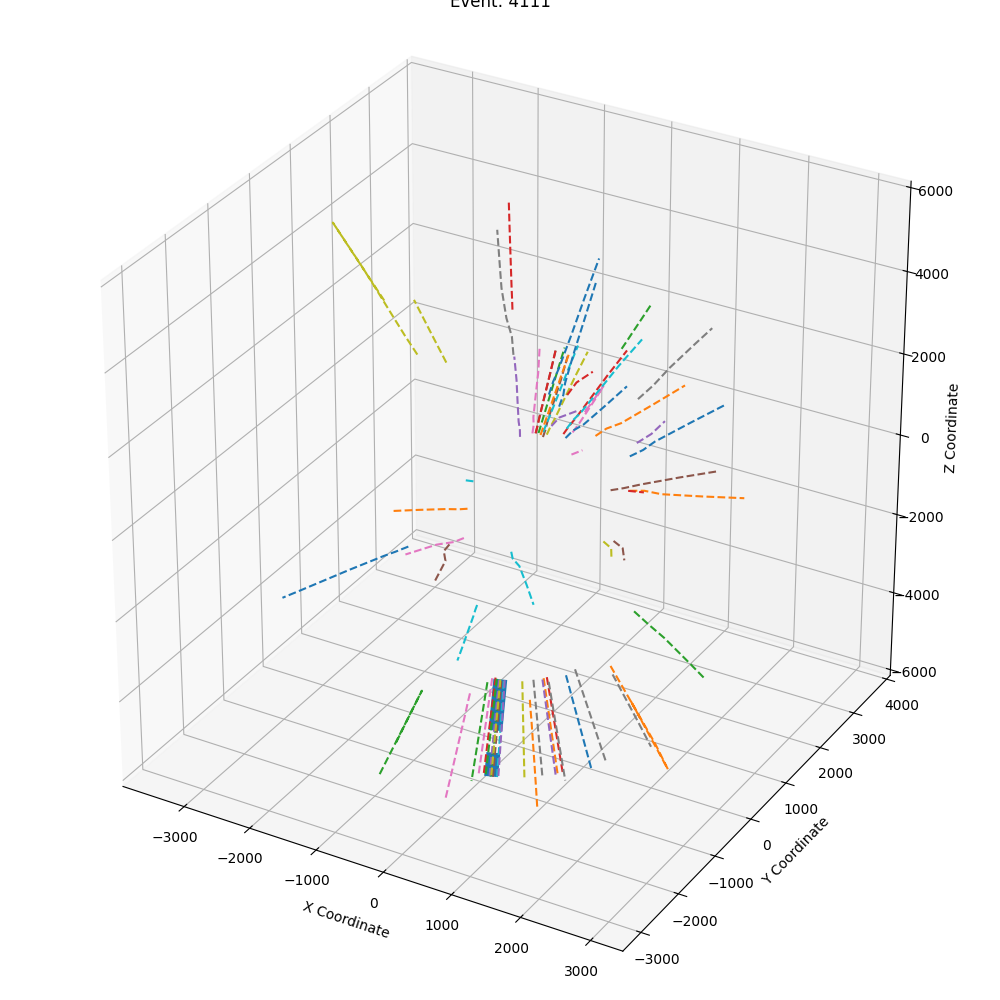

In [5]:
%matplotlib widget

focal_index = 0

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
#ax.set_xlim(-4000,4000)
#ax.set_ylim(-7000,7000)
#ax.set_zlim(-4000,4000)
ax.set_aspect('equal')
# ax.set_title("ATLAS Radial Calorimeters")
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')  # Assuming you meant to plot Z along the vertical in your original plotting order
ax.set_zlabel('Z Coordinate')  # And Y on the third dimension
plt.tight_layout()
plt.title(f"Event: {root_file['EventTree']['eventNumber'].array()[focal_index]}")
full_phi_list = [] 
trig = False
# Add tracks
for i in range(len(root_file["EventTree"]['trackPhi_EMB1'].array()[focal_index])):
    xl, yl, zl = [], [], []
    for loc, rPerp in fixed_r.items():
        eta = root_file["EventTree"][f'trackEta_{loc}'].array()[focal_index][i]
        phi = root_file["EventTree"][f'trackPhi_{loc}'].array()[focal_index][i]
        if phi > -500:
            print(phi)
            full_phi_list.append(phi)
            x, y, z = calculate_cartesian_coordinates(eta, phi, rPerp)
            xl.append(x)
            yl.append(y)
            zl.append(z)
    for loc, z_loc in fixed_z.items():
        eta = root_file["EventTree"][f'trackEta_{loc}'].array()[focal_index][i]
        phi = root_file["EventTree"][f'trackPhi_{loc}'].array()[focal_index][i]
        if phi > -500:
            print(phi)
            full_phi_list.append(phi)
            x, y, z = intersection_fixed_z(eta, phi, z_loc)
            xl.append(x)
            yl.append(y)
            zl.append(z)
    if len(xl)>0 and trig == False:
        print(i)
        ax.plot(xl, yl, zl, "--", label=f"{i} track", linewidth=10)
        print(xl, yl, zl)
        trig = True
    else:
        ax.plot(xl, yl, zl, "--",)

eta_arr = geo_file['CellGeo']['cell_geo_eta'].array()
phi_arr = geo_file['CellGeo']['cell_geo_phi'].array()
rPerp_arr = geo_file['CellGeo']['cell_geo_rPerp'].array()
xl, yl, zl = [], [], []

# Add Cell Hits
for idx, cluster_ids in enumerate(root_file["EventTree"]['cluster_cell_ID'].array()[focal_index]):
    if True:
        for cell_id in cluster_ids:
            index = ak.where(geo_file['CellGeo']['cell_geo_ID'].array() == cell_id)
            eta = eta_arr[index]
            phi = phi_arr[index]
            rPerp = rPerp_arr[index]
            x, y, z = calculate_cartesian_coordinates(eta, phi, rPerp)
            xl.append(x)
            yl.append(y)
            zl.append(z)
    print(idx)


ax.scatter(xl, yl, zl, s=1, marker='.')
te = 0
ax.scatter(xl[te], yl[te], zl[te], label=f"CELL ID {root_file['EventTree']['cluster_cell_ID'].array()[focal_index][0][te]}")

ax.scatter(0, 0, 0, label='Origin')
plt.legend()


[-1.3942015, -1.3942095, -1.394237, -1.3942541, -1.3942643, -1.3942684, -1.3942631, -0.5398306, -0.5397725, -0.53954697, -0.53936577, -0.5392076, -0.5389711, -0.53884125, -1.3829633, -1.3829947, -1.3830997, -1.3831705, -1.3832204, -1.3832654, -1.3832698, -0.46816492, -0.46796107, -0.4671891, -0.46659657, -0.46610662, -0.46544388, -0.4651308, -0.58159924, -0.5815457, -0.5813525, -0.5812021, -0.58107287, -0.58088845, -0.58079296, -1.3568912, -1.3568532, -1.3567123, -1.3565972, -1.3564929, -1.3563308, -1.3562374, -1.5507556, -1.5508387, -1.5511429, -1.5513612, -1.5515269, -1.5517142, -1.5517755, -0.5238263, -0.5240775, -0.52470917, -0.5251139, -0.5254752, -0.52589643, -0.52604234, -0.9662358, -0.96653813, -0.9676895, -0.9685822, -0.9693287, -0.9703563, -0.9708527, -1.3124349, -1.3122042, -1.3113887, -1.3107789, -1.3102808, -1.3096408, -1.3093657, -0.17412274, -0.17449084, -0.1754274, -0.17602919, -0.17657577, -0.17722866, -0.17746507, -0.9179498, -0.9170273, -0.9142749, -0.9132566, -0.912

(array([ 6., 12., 97., 29., 56., 29., 14., 48., 61., 16.]),
 array([-3.08007026e+00, -2.46424603e+00, -1.84842181e+00, -1.23259747e+00,
        -6.16773248e-01, -9.49025154e-04,  6.14875197e-01,  1.23069942e+00,
         1.84652376e+00,  2.46234798e+00,  3.07817221e+00]),
 <BarContainer object of 10 artists>)

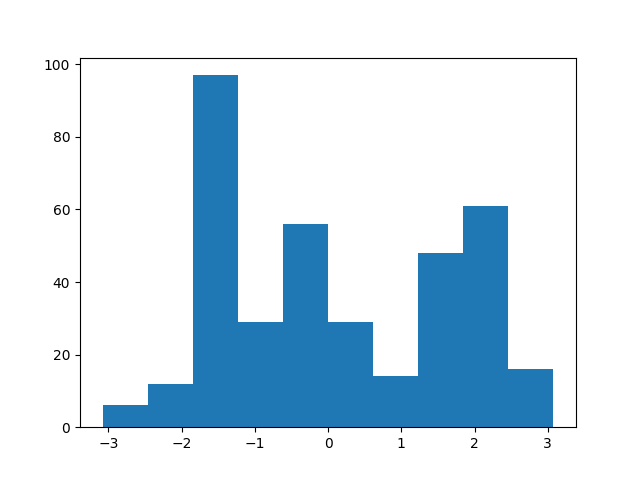

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
print(full_phi_list)
print(min(full_phi_list))
ax.hist(full_phi_list)

# Image the awk file

In [ ]:
import pyarrow.parquet as pq

def read_parquet(filename):
    table = pq.read_table(filename)
    ak_array = ak.from_arrow(table)
    return ak_array

ak_array = read_parquet(awk_file)

In [ ]:
ak_array

<Array [[{trackID: 0, ...}], ..., [{...}]] type='150 * var * {trackID: int6...'>

In [ ]:
focal_event_index = 0
focal_track_index = 0

window = ak_array[focal_event_index][focal_track_index]

print(window['track_layer_intersections']['X'])
print(window['track_layer_intersections']['Y'])
print(window['track_layer_intersections']['Z'])

[118, 124, 131, 139, 151, 168, 183]
[-663, -697, -732, -778, -847, -942, -1.02e+03]
[-3.79e+03, -3.98e+03, -4.2e+03, -4.46e+03, -4.87e+03, -5.42e+03, -5.9e+03]


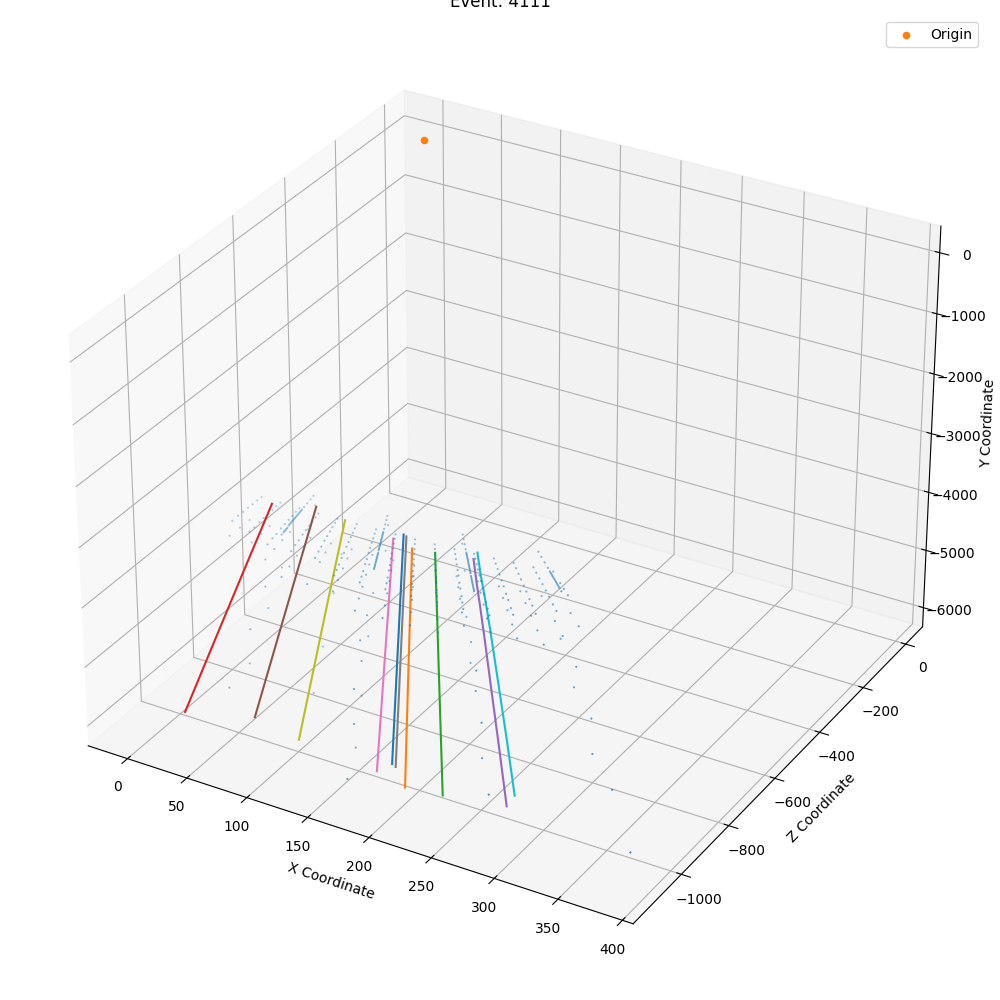

In [ ]:
%matplotlib widget

focal_event_index = 0
focal_track_index = 0

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
#ax.set_xlim(-4000,4000)
##ax.set_ylim(-7000,7000)
#ax.set_zlim(-4000,4000)
#ax.set_aspect('equal')
# ax.set_title("ATLAS Radial Calorimeters")
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Z Coordinate')  
ax.set_zlabel('Y Coordinate')  
plt.tight_layout()

window = ak_array[focal_event_index][focal_track_index]

plt.title(f"Event: {window['eventNumber']}")

# add focal track
ax.plot(list(window['track_layer_intersections']['X']), list(window['track_layer_intersections']['Y']), list(window['track_layer_intersections']['Z']))

# add adj tracks
for adj_track in window['associated_tracks']:
    ax.plot(list(adj_track['track_layer_intersections']['X']), list(adj_track['track_layer_intersections']['Y']), list(adj_track['track_layer_intersections']['Z']))

ax.scatter(list(window['associated_cells']['X']), list(window['associated_cells']['Y']), list(window['associated_cells']['Z']), s=1, marker='.')


ax.scatter(0, 0, 0, label='Origin')
plt.legend()


# Reproduce issue in isolation

In [ ]:
from data_processing.jets.jets_root_to_awk import cell_ID_geo, eta_geo, phi_geo, rPerp_geo, process_events, fields_list, process_and_filter_cells
from data_processing.jets.common_utils import calculate_delta_r, intersection_fixed_r, intersection_fixed_z

events = uproot.open("/home/jhimmens/workspace/jetpointnet/development/issue_data/JZ4_5.root")["EventTree"]
generator =  events.iterate(fields_list, library="ak", step_size=1)
chunk = next(generator)

event_cells, event_cell_truths, track_etas, track_phis = (
            process_and_filter_cells(
                chunk[0], cell_ID_geo, eta_geo, phi_geo, rPerp_geo
            )
)



[-1.e+09 -1.e+09 -1.e+09 ... -1.e+09 -1.e+09 -1.e+09]
-1000000000.0


(array([ 6., 12., 97., 29., 56., 29., 14., 48., 61., 16.]),
 array([-3.08007026e+00, -2.46424603e+00, -1.84842181e+00, -1.23259747e+00,
        -6.16773248e-01, -9.49025154e-04,  6.14875197e-01,  1.23069942e+00,
         1.84652376e+00,  2.46234798e+00,  3.07817221e+00]),
 <BarContainer object of 10 artists>)

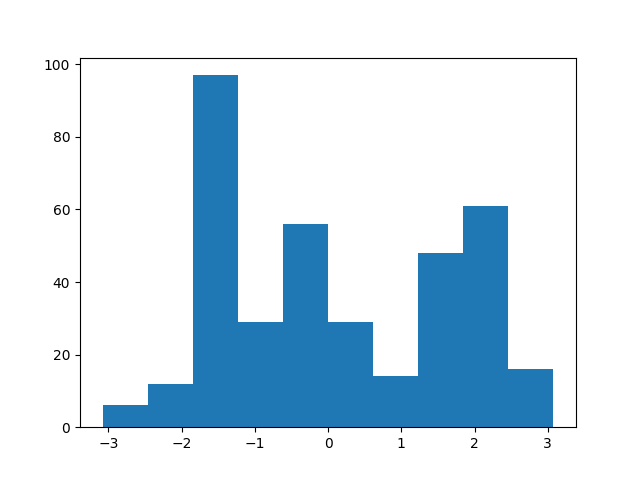

In [ ]:
import numpy as np
all_phis = []
for l in track_phis.values():
    all_phis.extend(l)
a_phi = np.array(all_phis)
fig = plt.figure()
ax = fig.add_subplot()
print(a_phi)
print(min(a_phi))
ax.hist(a_phi[a_phi > -500])

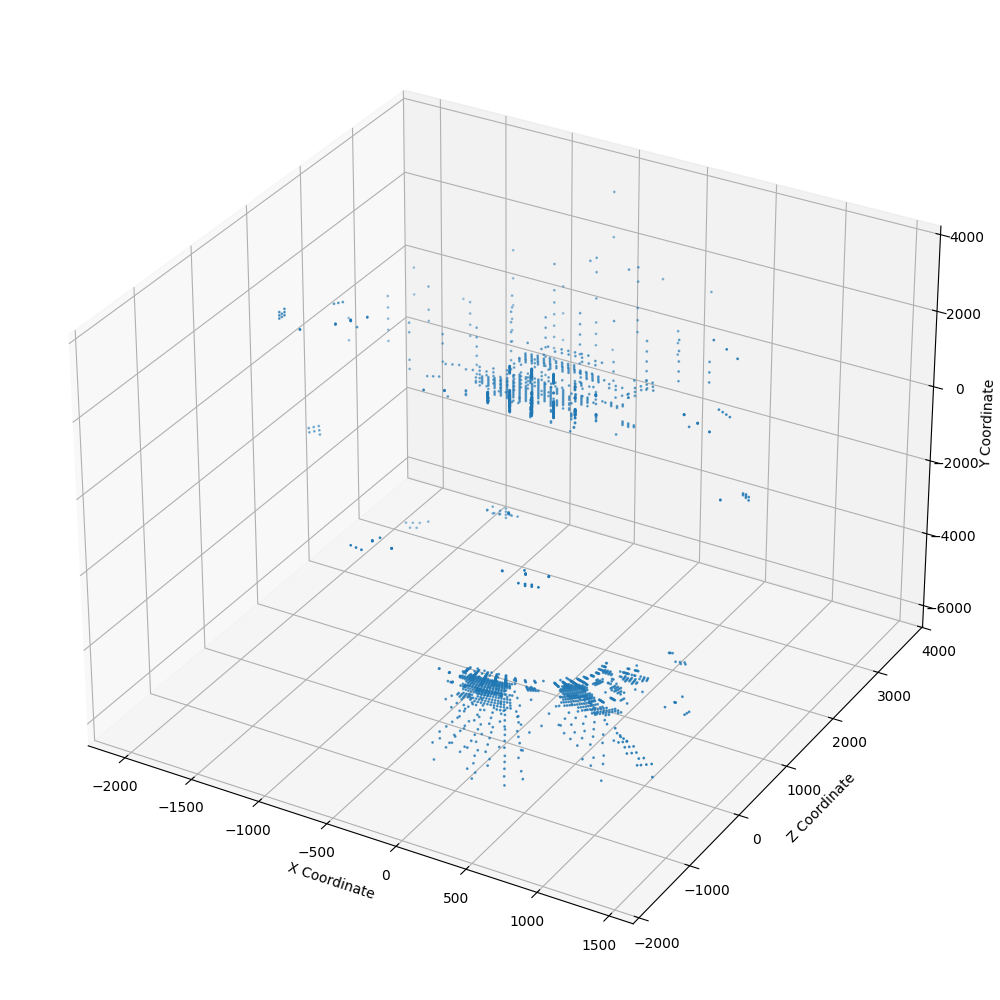

In [ ]:
final_data = process_events(chunk, cell_ID_geo, eta_geo, phi_geo, rPerp_geo, 0)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
#ax.set_xlim(-4000,4000)
##ax.set_ylim(-7000,7000)
#ax.set_zlim(-4000,4000)
#ax.set_aspect('equal')
# ax.set_title("ATLAS Radial Calorimeters")
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Z Coordinate')  
ax.set_zlabel('Y Coordinate')  
plt.tight_layout()
ax.scatter(event_cells['X'], event_cells['Y'], event_cells['Z'], s=1)

# run the split and delta R cut

In [ ]:
import numpy as np
def calculate_cartesian_coordinates(eta, phi, rPerp):
    X = rPerp * np.cos(phi)
    Y = rPerp * np.sin(phi)
    Z = rPerp * np.sinh(eta)

    return X, Y, Z


def eta_phi_to_cartesian(eta, phi, R=1):
    # theta = 2 * np.arctan(np.exp(-eta))
    x = R * np.cos(phi)
    y = R * np.sin(phi)
    z = R * np.sinh(eta)  # Corrected to use sinh
    return x, y, z


# Define the function to calculate the intersection with a fixed R layer
def intersection_fixed_r(eta, phi, fixed_r):
    x, y, z = eta_phi_to_cartesian(eta, phi, R=fixed_r)
    return x, y, z


# Define the function to calculate the intersection with a fixed Z layer
def intersection_fixed_z(eta, phi, fixed_z):
    x, y, z_unit = eta_phi_to_cartesian(eta, phi)
    if z_unit == 0:
        raise ValueError("z_unit is zero, cannot scale x and y coordinates")
    scale_factor = fixed_z / z_unit
    print(z_unit)
    x *= scale_factor
    y *= scale_factor
    z = fixed_z * np.sign(eta)
    return x, y, z


# Helper function to calculate delta R using eta and phi directly
def calculate_delta_r_old(eta1, phi1, eta2, phi2):
    dphi = np.mod(phi2 - phi1 + np.pi, 2 * np.pi) - np.pi
    deta = eta2 - eta1
    return np.sqrt(deta**2 + dphi**2)

# Helper function to calculate delta R using eta and phi directly
def calculate_delta_r(eta1, phi1, eta2, phi2):
    _dphi = np.abs(phi2 - phi1)
    dphi = np.where(_dphi > np.pi, _dphi - np.pi, _dphi)
    deta = eta2 - eta1
    return np.sqrt(deta**2 + dphi**2)

In [ ]:
track_etas

{'EMB1': <Array [-1e+09, -1e+09, -1e+09, ..., 0.696, -1e+09, 0.186] type='64 * float32'>,
 'EMB2': <Array [-1e+09, -1e+09, -1e+09, ..., 0.694, -1e+09, 0.182] type='64 * float32'>,
 'EMB3': <Array [-1e+09, -1e+09, -1e+09, ..., 0.687, -1e+09, 0.171] type='64 * float32'>,
 'EME1': <Array [-2.43, -2.41, -2.37, ..., -1e+09, 1.78, -1e+09] type='64 * float32'>,
 'EME2': <Array [-2.43, -2.41, -2.37, ..., -1e+09, 1.78, -1e+09] type='64 * float32'>,
 'EME3': <Array [-2.43, -2.41, -2.37, ..., -1e+09, 1.78, -1e+09] type='64 * float32'>,
 'HEC0': <Array [-2.43, -2.42, -2.37, ..., -1e+09, 1.79, -1e+09] type='64 * float32'>,
 'HEC1': <Array [-2.43, -2.42, -2.37, ..., -1e+09, 1.79, -1e+09] type='64 * float32'>,
 'HEC2': <Array [-2.44, -2.42, -2.38, ..., -1e+09, -1e+09, -1e+09] type='64 * float32'>,
 'HEC3': <Array [-2.44, -2.42, -2.38, ..., -1e+09, -1e+09, -1e+09] type='64 * float32'>,
 'TileBar0': <Array [-1e+09, -1e+09, -1e+09, ..., 0.681, -1e+09, 0.163] type='64 * float32'>,
 'TileBar1': <Array [-1

In [ ]:
fixed_r = {
    'EMB1': 1532.18,
    'EMB2': 1723.89,
    'EMB3': 1923.02,
    'TileBar0': 2450.00,
    'TileBar1': 2995.00,
    'TileBar2': 3630.00,
    'TileGap1': 3215.00,
    'TileGap2': 3630.00,
    'TileGap3': 2246.50,
    'TileExt0': 2450.00,
    'TileExt1': 2870.00,
    'TileExt2': 3480.00
}

fixed_z = {
    'EME1': 3790.03,
    'EME2': 3983.68,
    'EME3': 4195.84,
    'HEC0': 4461.25,
    'HEC1': 4869.50,
    'HEC2': 5424.50,
    'HEC3': 5905.00,
}


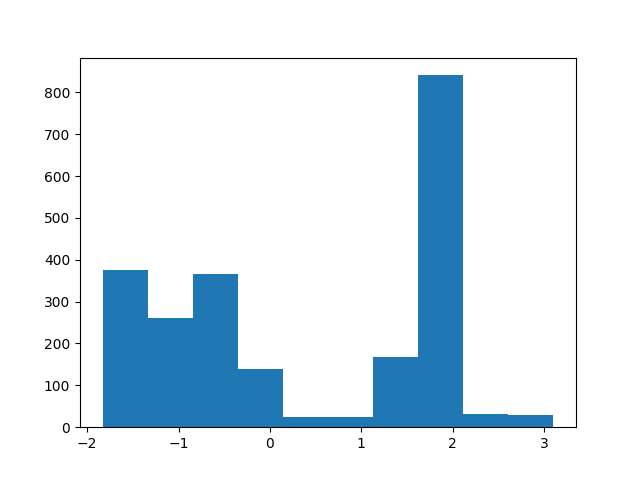

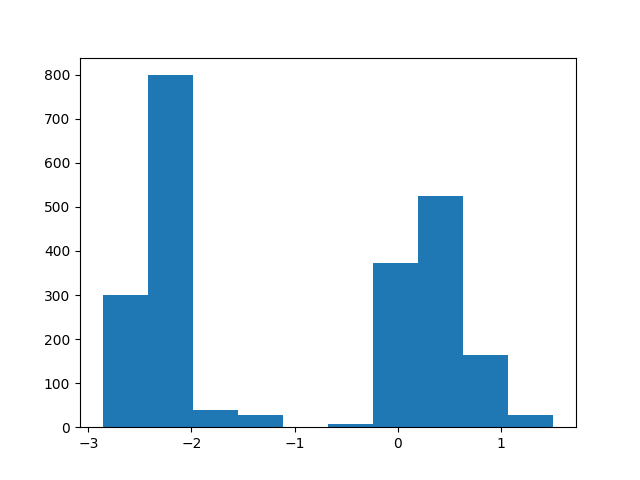

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(event_cells["phi"][event_cells["phi"] > -500])
plt.show()
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(event_cells["eta"][event_cells["eta"] > -500])
plt.show()

-2.4286766 -1.3942015


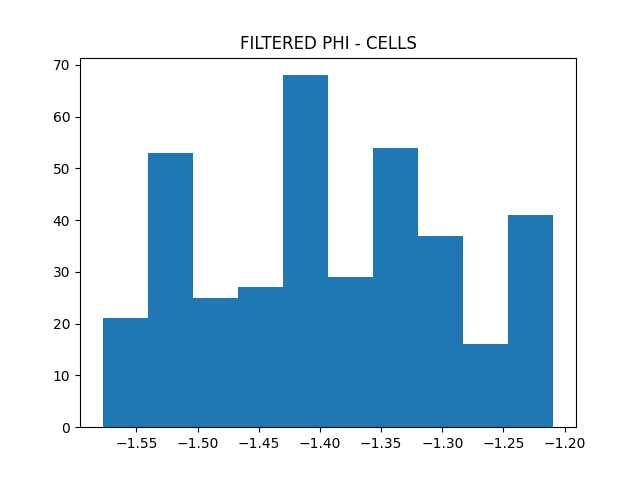

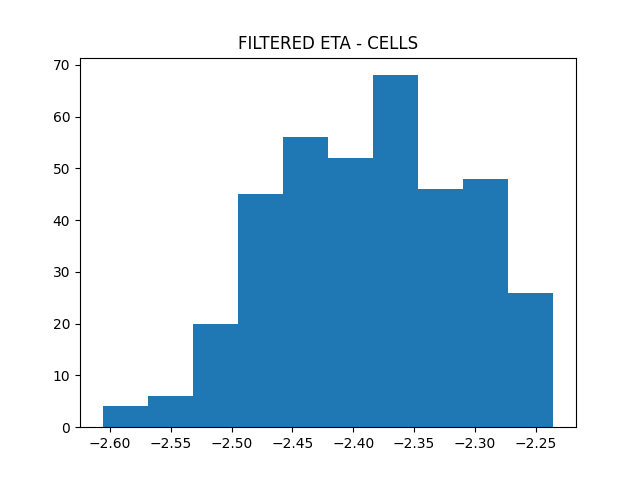

{ID: 740294752, E: 284, eta: -2.56, phi: -1.52, X: 33.8, Y: -615, Z: ..., ...}
FIXED R
FIXED R
FIXED R
-5.6278533935546875
FIXED Z
VALID EME1
-118.3091056433216 662.9678619301444 -3790.03
-5.63018274307251
FIXED Z
VALID EME2
-124.29704462195537 696.5546389320752 -3983.68
-5.63981294631958
FIXED Z
VALID EME3
-130.67305738257602 732.4021045449415 -4195.84
-5.648386001586914
FIXED Z
VALID HEC0
-138.7147044621559 777.5509789209199 -4461.25
-5.656662940979004
FIXED Z
VALID HEC1
-151.1782903953588 847.464543317762 -4869.5
-5.670915603637695
FIXED Z
VALID HEC2
-167.98171650630528 941.6820961872893 -5424.5
-5.680011749267578
FIXED Z
VALID HEC3
-182.57400405042105 1023.4533629878421 -5905.0
FIXED R
FIXED R
FIXED R
FIXED R
FIXED R
FIXED R
FIXED R
FIXED R
FIXED R


/tmp/ipykernel_1755653/685834044.py:14: RuntimeWarning: overflow encountered in sinh
  z = R * np.sinh(eta)  # Corrected to use sinh


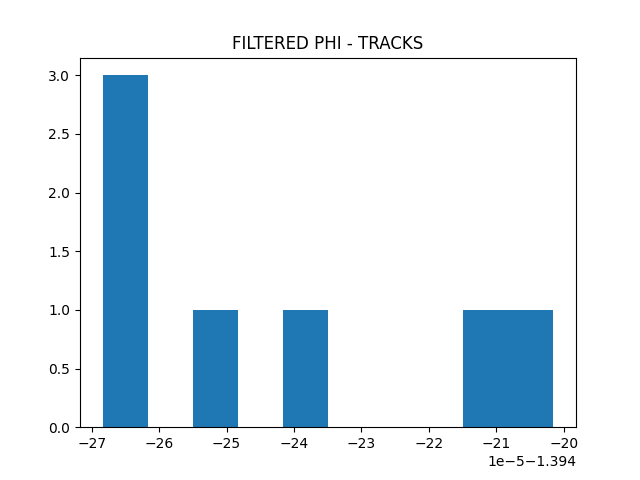

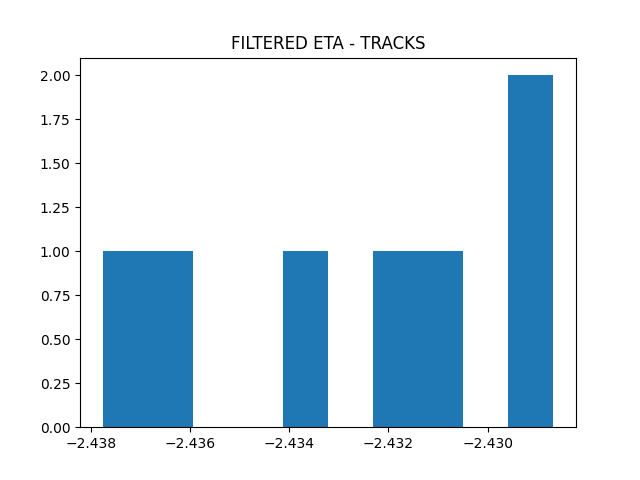

[-118.3091056433216, -124.29704462195537, -130.67305738257602, -138.7147044621559, -151.1782903953588, -167.98171650630528, -182.57400405042105]
[662.9678619301444, 696.5546389320752, 732.4021045449415, 777.5509789209199, 847.464543317762, 941.6820961872893, 1023.4533629878421]
[-3790.03, -3983.68, -4195.84, -4461.25, -4869.5, -5424.5, -5905.0]


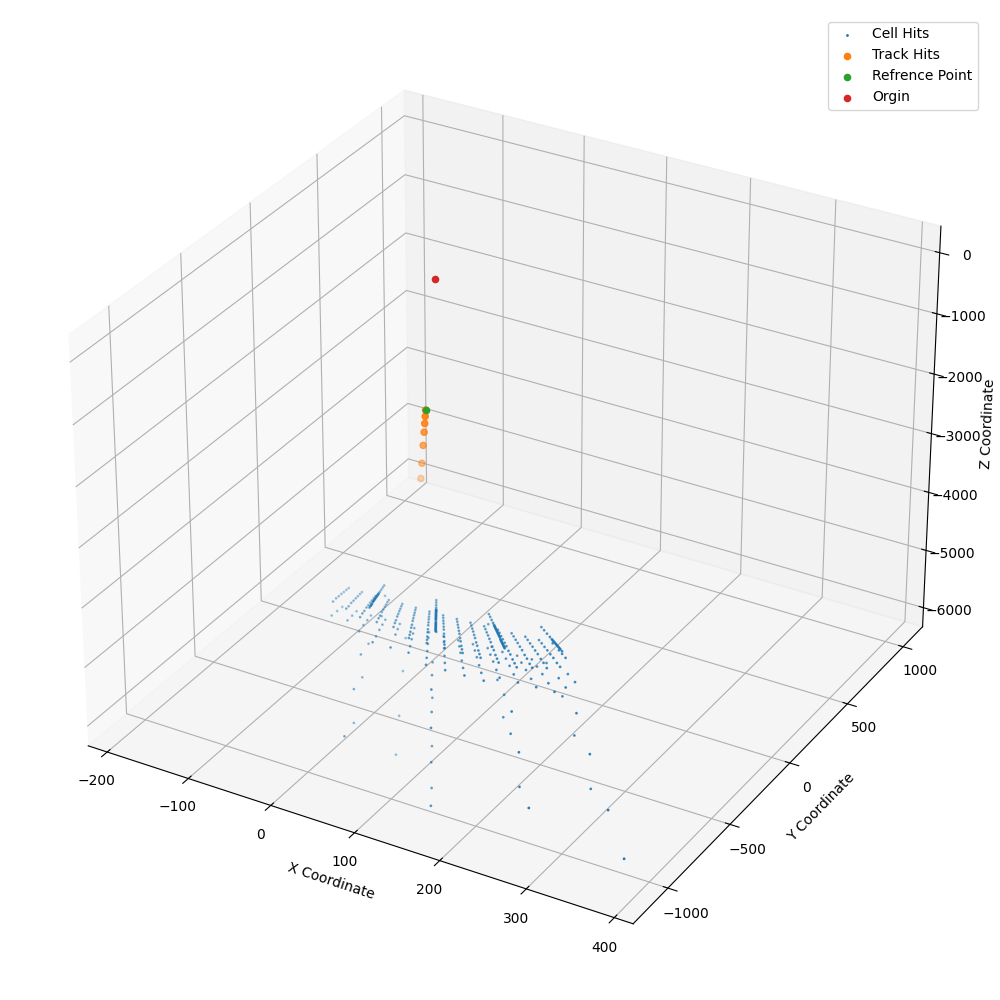

In [ ]:


# Use cell eta and phi directly from the `cells` structured array
cell_eta = event_cells["eta"]
cell_phi = event_cells["phi"]

track_eta_ref = track_etas["EME1"][0]
track_phi_ref = track_phis["EME1"][0]
print(track_eta_ref, track_phi_ref)

# Vectorized calculation of delta R for all cells with respect to the track
delta_r = calculate_delta_r(track_eta_ref, track_phi_ref, cell_eta, cell_phi)



# Creating a mask for cells within the delta R threshold
mask = delta_r <= 0.2 # MAX_DISTANCE

# Apply the mask to filter cells directly using Awkward Array's boolean masking
filtered_cells = event_cells[mask]
filtered_cell_truths = event_cell_truths[mask]

fig = plt.figure()
ax = fig.add_subplot()
ax.hist(filtered_cells["phi"])
ax.set_title("FILTERED PHI - CELLS")
plt.show()

fig = plt.figure()
ax = fig.add_subplot()
ax.hist(filtered_cells["eta"])
ax.set_title("FILTERED ETA - CELLS")
plt.show()

print(filtered_cells[0])

etas, phis = [], []
xl, yl, zl = [], [], []
for layer in track_etas.keys():
    if layer in fixed_r.keys():
        x, y, z = intersection_fixed_r(track_etas[layer][0], track_phis[layer][0], fixed_r[layer])
        print("FIXED R")
    else:
        x, y, z = intersection_fixed_z(track_etas[layer][0], track_phis[layer][0], fixed_z[layer])
        print("FIXED Z")
    
    if track_etas[layer][0] > -100000:
        print('VALID', layer)
        etas.append(track_etas[layer][0]) 
        phis.append(track_phis[layer][0])
        # etas.append(track_etas[layer][2]) 
        # phis.append(track_phis[layer][2])
        # etas.append(track_etas[layer][5]) 
        # phis.append(track_phis[layer][5])
        # etas.append(track_etas[layer][6]) 
        # phis.append(track_phis[layer][6])
        # etas.append(track_etas[layer][9]) 
        # phis.append(track_phis[layer][9])
        print(x,y,z)
        xl.append(x)
        yl.append(y)
        zl.append(z)

fig = plt.figure()
ax = fig.add_subplot()
ax.hist(phis)
ax.set_title("FILTERED PHI - TRACKS")
plt.show()

fig = plt.figure()
ax = fig.add_subplot()
ax.hist(etas)
ax.set_title("FILTERED ETA - TRACKS")
plt.show()

print(xl, yl, zl, sep="\n")


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')  
ax.set_zlabel('Z Coordinate')  
plt.tight_layout()
ax.scatter(filtered_cells['X'], filtered_cells['Y'], filtered_cells['Z'], s=1, label="Cell Hits")
ax.scatter(np.array(xl), np.array(yl), np.array(zl), label="Track Hits")
ax.scatter(0,0,0, label="Orgin")
plt.legend()

In [ ]:
import numpy as np
index = np.where(cell_ID_geo == 740294752)
eta = eta_geo[index]
phi = phi_geo[index]
rPerp = rPerp_geo[index]
print(eta, phi, rPerp)
print(calculate_cartesian_coordinates(eta, phi, rPerp))
calculate_delta_r(eta1=eta, eta2=track_eta_ref, phi1=phi, phi2=track_phi_ref)

[-2.5620654] [-1.5159549] [616.2654]
(array([33.779964], dtype=float32), array([-615.33887], dtype=float32), array([-3970.4182], dtype=float32))


array([0.18060021], dtype=float32)

# Functions for review

In [ ]:
final_data

<Array [[{trackID: 0, ...}, {...}, ..., {...}]] type='1 * var * {trackID: i...'>

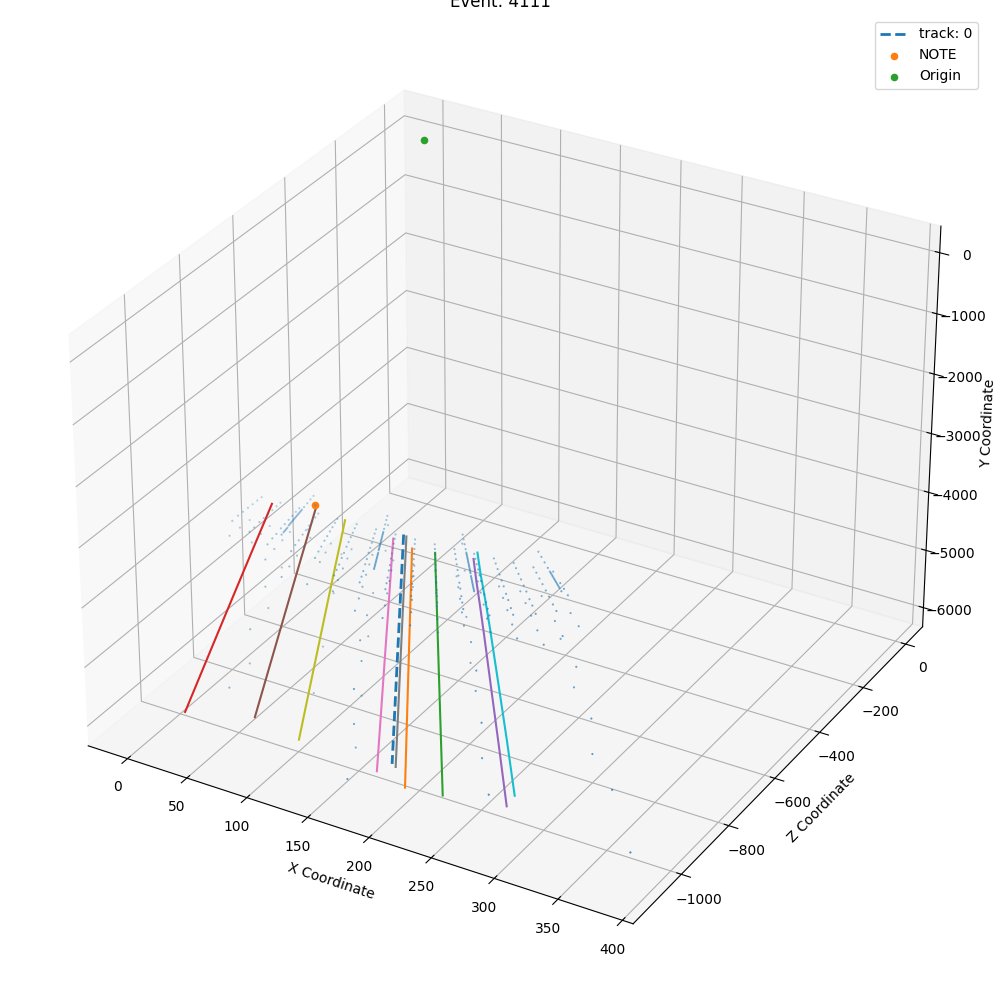

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
#ax.set_xlim(-4000,4000)
##ax.set_ylim(-7000,7000)
#ax.set_zlim(-4000,4000)
#ax.set_aspect('equal')
# ax.set_title("ATLAS Radial Calorimeters")
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Z Coordinate')  
ax.set_zlabel('Y Coordinate')  
plt.tight_layout()

window = final_data[0][0]

plt.title(f"Event: {window['eventNumber']}")

# add focal track
ax.plot(list(window['track_layer_intersections']['X']), list(window['track_layer_intersections']['Y']), list(window['track_layer_intersections']['Z']), '--', label=f"track: {focal_track_index}", linewidth=2)

# add adj tracks
for adj_track in window['associated_tracks']:
    ax.plot(list(adj_track['track_layer_intersections']['X']), list(adj_track['track_layer_intersections']['Y']), list(adj_track['track_layer_intersections']['Z']))

index_cell = ak.where(window['associated_cells']['ID'] == 740294752)

ax.scatter(list(window['associated_cells']['X']), list(window['associated_cells']['Y']), list(window['associated_cells']['Z']), s=1, marker='.')
ax.scatter(window['associated_cells']['X'][index_cell], window['associated_cells']['Y'][index_cell], window['associated_cells']['Z'][index_cell], label="NOTE")

ax.scatter(0, 0, 0, label='Origin')
plt.legend()



In [ ]:
geo_root_file = uproot.open("/fast_scratch_1/atlas/pflow/rho_small.root" + ":CellGeo")
geo_root_file.keys()

['cell_geo_ID',
 'cell_geo_sampling',
 'cell_geo_eta',
 'cell_geo_phi',
 'cell_geo_rPerp',
 'cell_geo_deta',
 'cell_geo_dphi',
 'cell_geo_volume',
 'cell_geo_sigma',
 'cell_geo_prevInPhi',
 'cell_geo_nextInPhi',
 'cell_geo_prevInEta',
 'cell_geo_nextInEta',
 'cell_geo_prevInSamp',
 'cell_geo_nextInSamp',
 'cell_geo_prevSubDet',
 'cell_geo_nextSubDet',
 'cell_geo_prevSuperCalo',
 'cell_geo_nextSuperCalo']

# From the NPZ file

In [12]:
import numpy as np
import matplotlib.pyplot as plt
POINT_TYPE_LABELS = {0: "focus hit", 1: "cell", 2: "unfocus hit", -1: "padding"}
POINT_TYPE_ENCODING = {v: k for k, v in POINT_TYPE_LABELS.items()}



npz_file = "/fast_scratch_1/atlas/pflow/jhimmens_working_files/pnet_data/processed_files/collected_data/rev_4/SavedNpz/deltaR=0.2_maxLen=800_EScale=1/val/JZ4/user.mswiatlo.39955735._000628.mltree.root_chunk_0_val.parquet.npz"
window = np.load(npz_file)["feats"][10]



window

array([(13933,         -1, 17,  6.08353410e-04, -1.0000000e+00, -1.00000000e+00,  0,  0,  0.87988174,  0.9175992 ,  0.8509477 ,  0.        ,  0.90274584, -1.00000000e+00, 38.84086  ),
       (13933,         -1, 17,  0.00000000e+00, -1.0000000e+00, -1.00000000e+00,  0,  0,  0.8188467 ,  0.85279685,  0.8058978 ,  0.        ,  0.90274584, -1.00000000e+00, 38.84086  ),
       (13933,         -1, 17,  1.98832643e-03, -1.0000000e+00, -1.00000000e+00,  0,  0,  0.7547549 ,  0.7860199 ,  0.7603214 ,  0.        ,  0.90274584, -1.00000000e+00, 38.84086  ),
       (13933,         -1, 17,  3.43119912e-03, -1.0000000e+00, -1.00000000e+00,  0,  0,  0.5865114 ,  0.6082503 ,  0.6373752 ,  0.        ,  0.90274584, -1.00000000e+00, 38.84086  ),
       (13933,         -1, 17,  4.28771041e-03, -1.0000000e+00, -1.00000000e+00,  0,  0,  0.4126055 ,  0.42433277,  0.5101155 ,  0.        ,  0.90274584, -1.00000000e+00, 38.84086  ),
       (13933,         -1, 17,  5.88297984e-03, -1.0000000e+00, -1.00000000e+00,

In [13]:
focus_hit_x = []
focus_hit_y = []
focus_hit_z = []

cell_x_list = []
cell_y_list = []
cell_z_list = []
cell_model_attribution = []
cell_truth_attribution = []
cell_E_list = []

non_focus_tracks = {}
delta_r_dict = {}
pt_dict = {}

for point_index, point in enumerate(window):
    # this would be much nicer as a match-case statement, but it kept giving me issues
    if point['category'] == POINT_TYPE_ENCODING["focus hit"]:
        focus_hit_x.append(point["normalized_x"])
        focus_hit_y.append(point["normalized_y"])
        focus_hit_z.append(point["normalized_z"])
    elif point['category'] == POINT_TYPE_ENCODING["cell"]:
        cell_x_list.append(point["normalized_x"])
        cell_y_list.append(point["normalized_y"])
        cell_z_list.append(point["normalized_z"])
        cell_E_list.append(point["cell_E"])
        #cell_model_attribution.append(int(model_results[window_index][point_index] >= OUTPUT_LAYER_SEGMENTATION_CUTOFF))
        cell_truth_attribution.append(point['truth_cell_fraction_energy'] * point['truth_cell_total_energy'])
    elif point['category'] == POINT_TYPE_ENCODING["unfocus hit"]:
        if point['track_ID'] in non_focus_tracks:
            non_focus_tracks[point['track_ID']]['non_focus_hit_x'].append(point["normalized_x"])
            non_focus_tracks[point['track_ID']]['non_focus_hit_y'].append(point["normalized_y"])
            non_focus_tracks[point['track_ID']]['non_focus_hit_z'].append(point["normalized_z"])
        else:
            non_focus_tracks[point['track_ID']] = {
                'non_focus_hit_x': [point["normalized_x"]],
                'non_focus_hit_y': [point["normalized_y"]],
                'non_focus_hit_z': [point["normalized_z"]],
                'non_focus_pt': point["track_pt"],
                'delta_R': point["delta_R"],
            }
    elif point['category'] == POINT_TYPE_ENCODING["padding"]:
        pass
    else:
        raise Exception("Unknown point in npz files!")

/tmp/ipykernel_492044/1132201297.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(pad=0)


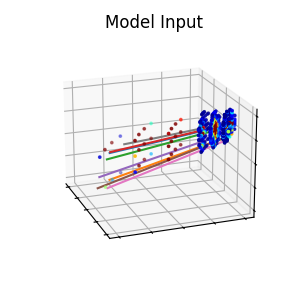

In [41]:
fig = plt.figure(figsize=(3, 3))
# %matplotlib widget
ax3 = fig.add_subplot(projection='3d')
ax3.set_title("Model Input")

for ax_i in [ax3]:
    ax_i.plot(focus_hit_x, focus_hit_y, focus_hit_z)
    if True:
        for non_focal_id, non_focal_track in non_focus_tracks.items():
            ax_i.plot(non_focal_track['non_focus_hit_x'],
                    non_focal_track['non_focus_hit_y'], 
                    non_focal_track['non_focus_hit_z'], 
                    label=f"Non Focal - ID: {non_focal_id}")
        # ax_i.legend()
    # ax_i.set_xlabel('X Coordinate (mm)')
    # ax_i.set_ylabel('Y Coordinate (mm)')
    # ax_i.set_zlabel('Z Coordinate (mm)')
ax3.view_init(elev=20, azim=-20)

# First subplots'
sc1 = ax3.scatter(cell_x_list, cell_y_list, cell_z_list, s=3, c=cell_E_list, cmap='jet', vmin=0, vmax=1)
#cbar1 = plt.colorbar(sc1, ax=ax3)
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_zticklabels([])
#cbar1.set_label('Cell Energ (Normalized)')
#plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
plt.tight_layout(pad=0)
plt.savefig("Evetrre.png", dpi=800, transparent=True)
